In [3]:
import pandas as pd
import xlwings as xw

In [5]:
path = r'D:\python\python-real-estate-master\python-real-estate-master\데이터\★(월간)KB주택가격동향_시계열(2019.01)12831994601335062.xls'
wb = xw.Book(path)                
sheet = wb.sheets['매매종합']   
row_num = sheet.range(1,1).end('down').end('down').end('down').row  
data_range = 'A2:GE' + str(row_num)
raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value 

In [6]:
raw_data

,구분,전국,서울,강북,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,양산,거제,진주,김해,통영,제주도,제주/\n서귀포,기타지방
0,None,None,None,None,강북구,광진구,노원구,도봉구,동대문구,마포구,...,의창구,진해구,None,None,None,None,None,None,None,None
1,Classification,Total,Seoul,Northern seoul,Gangbuk-gu,Gwangjin-gu,Nowon-gu,Dobong-gu,Dongdaemun-gu,Mapo-gu,...,Uichang,Jinhae,Yangsan,Geoje,Jinju,Gimhae,Tongyoung,Jeju-do,Jeju/\nSeogwipo,Non-Metropolitan Area
2,86.1,34.6561,30.0438,41.94,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,2,34.6561,30.0438,41.8891,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,3,34.708,30.0024,41.8891,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,9,99.1934,98.0076,97.8393,99.0736,98.7057,97.0952,97.6818,97.9074,98.8207,...,101.421,100.596,None,None,101.125,101.869,None,None,100.146,100.639
395,10,99.7503,99.4103,99.2439,99.822,99.4012,99.3205,99.2108,99.3682,99.7982,...,100.878,100.448,None,None,100.852,101.262,None,None,100.091,100.452
396,11,99.9023,99.8052,99.7805,99.9692,99.9835,99.8709,99.7665,99.9243,99.933,...,100.685,100.173,None,None,100.505,100.382,None,None,100.016,100.098
397,12,99.9799,99.96,99.9568,99.9821,100,100.019,99.9425,100,100.006,...,100.546,100.058,None,None,100.154,100.246,None,None,100.007,100.052


In [7]:
bignames = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
bigname_list = bignames.split(' ')
big_col = list(raw_data.columns)
small_col = list(raw_data.iloc[0])

for num, gu_data in enumerate(small_col):
    if gu_data == None:
        small_col[num] = big_col[num]
    
    check = num
    while True:
        if big_col[check] in bigname_list:
            big_col[num] = big_col[check]
            break
        else:
            check = check - 1
            
big_col[129] = '경기' 
big_col[130] = '경기'
small_col[185] = '서귀포'

raw_data.columns = [big_col, small_col]
new_col_data = raw_data.drop([0,1])

In [12]:
raw_data.iloc[2]

구분    구분         86.1
전국    전국      34.6561
서울    서울      30.0438
      강북        41.94
      강북구        None
               ...   
경남    김해         None
      통영         None
제주도   제주도        None
      서귀포        None
기타지방  기타지방       None
Name: 2, Length: 187, dtype: object

In [8]:
new_col_data

구분       전국       서울                                               \
         구분       전국       서울       강북      강북구      광진구      노원구      도봉구   
2      86.1  34.6561  30.0438    41.94     None     None     None     None   
3         2  34.6561  30.0438  41.8891     None     None     None     None   
4         3   34.708  30.0024  41.8891     None     None     None     None   
5         4  34.4486  29.8366  41.7366     None     None     None     None   
6         5  34.2929   29.588  41.2791     None     None     None     None   
..      ...      ...      ...      ...      ...      ...      ...      ...   
394       9  99.1934  98.0076  97.8393  99.0736  98.7057  97.0952  97.6818   
395      10  99.7503  99.4103  99.2439   99.822  99.4012  99.3205  99.2108   
396      11  99.9023  99.8052  99.7805  99.9692  99.9835  99.8709  99.7665   
397      12  99.9799    99.96  99.9568  99.9821      100  100.019  99.9425   
398  2019.1      100      100      100      100      100      100      100   

                       ...       경남                                         \
        동대문구      마포구  ...      의창구      진해구    양산    거제       진주       김해   
2       None     None  ...     None     None  None  None     None     None   
3       None     None  ...     None     None  None  None     None     None   
4       None     None  ...     None     None  None  None     None     None   
5       None     None  ...     None     None  None  None     None     None   
6       None     None  ...     None     None  None  None     None     None   
..       ...      ...  ...      ...      ...   ...   ...      ...      ...   
394  97.9074  98.8207  ...  101.421  100.596  None  None  101.125  101.869   
395  99.3682  99.7982  ...  100.878  100.448  None  None  100.852  101.262   
396  99.9243   99.933  ...  100.685  100.173  None  None  100.505  100.382   
397      100  100.006  ...  100.546  100.058  None  None  100.154  100.246   
398      100      100  ...      100      100  None  None      100      100   

            제주도              기타지방  
       통영   제주도      서귀포     기타지방  
2    None  None     None     None  
3    None  None     None     None  
4    None  None     None     None  
5    None  None     None     None  
6    None  None     None     None  
..    ...   ...      ...      ...  
394  None  None  100.146  100.639  
395  None  None  100.091  100.452  
396  None  None  100.016  100.098  
397  None  None  100.007  100.052  
398  None  None      100      100  

[397 rows x 187 columns]

In [10]:
list(new_col_data['구분']['구분'])

[86.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 87.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 88.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 89.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 90.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 91.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 92.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 93.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 94.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 95.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 96.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 97.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 98.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 99.1,
 2.0,

In [13]:
# [예제 2.9] 인덱스를 위한 날짜 리스트 만들기 

index_list = list(new_col_data['구분']['구분'])

new_index = []

for num, raw_index in enumerate(index_list):
    temp = str(raw_index).split('.')
    if int(temp[0]) > 12 :
        if len(temp[0]) == 2:
            new_index.append('19' + temp[0] + '.' + temp[1])
        else:
            new_index.append(temp[0] + '.' + temp[1])
    else:
        new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0])

        
# [예제 2.10] 만들어진 날짜 리스트를 인덱스로 설정 

new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
cleaned_data  = new_col_data.drop(('구분', '구분'), axis=1)

In [14]:
cleaned_data

전국       서울                                               \
                 전국       서울       강북      강북구      광진구      노원구      도봉구   
1986-01-01  34.6561  30.0438    41.94     None     None     None     None   
1986-02-01  34.6561  30.0438  41.8891     None     None     None     None   
1986-03-01   34.708  30.0024  41.8891     None     None     None     None   
1986-04-01  34.4486  29.8366  41.7366     None     None     None     None   
1986-05-01  34.2929   29.588  41.2791     None     None     None     None   
...             ...      ...      ...      ...      ...      ...      ...   
2018-09-01  99.1934  98.0076  97.8393  99.0736  98.7057  97.0952  97.6818   
2018-10-01  99.7503  99.4103  99.2439   99.822  99.4012  99.3205  99.2108   
2018-11-01  99.9023  99.8052  99.7805  99.9692  99.9835  99.8709  99.7665   
2018-12-01  99.9799    99.96  99.9568  99.9821      100  100.019  99.9425   
2019-01-01      100      100      100      100      100      100      100   

                                       ...       경남                       \
               동대문구      마포구     서대문구  ...      의창구      진해구    양산    거제   
1986-01-01     None     None     None  ...     None     None  None  None   
1986-02-01     None     None     None  ...     None     None  None  None   
1986-03-01     None     None     None  ...     None     None  None  None   
1986-04-01     None     None     None  ...     None     None  None  None   
1986-05-01     None     None     None  ...     None     None  None  None   
...             ...      ...      ...  ...      ...      ...   ...   ...   
2018-09-01  97.9074  98.8207  95.5769  ...  101.421  100.596  None  None   
2018-10-01  99.3682  99.7982  97.3611  ...  100.878  100.448  None  None   
2018-11-01  99.9243   99.933  98.4975  ...  100.685  100.173  None  None   
2018-12-01      100  100.006  99.6298  ...  100.546  100.058  None  None   
2019-01-01      100      100      100  ...      100      100  None  None   

                                     제주도              기타지방  
                 진주       김해    통영   제주도      서귀포     기타지방  
1986-01-01     None     None  None  None     None     None  
1986-02-01     None     None  None  None     None     None  
1986-03-01     None     None  None  None     None     None  
1986-04-01     None     None  None  None     None     None  
1986-05-01     None     None  None  None     None     None  
...             ...      ...   ...   ...      ...      ...  
2018-09-01  101.125  101.869  None  None  100.146  100.639  
2018-10-01  100.852  101.262  None  None  100.091  100.452  
2018-11-01  100.505  100.382  None  None  100.016  100.098  
2018-12-01  100.154  100.246  None  None  100.007  100.052  
2019-01-01      100      100  None  None      100      100  

[397 rows x 186 columns]

In [15]:
new_col_data

구분       전국       서울                                      \
                구분       전국       서울       강북      강북구      광진구      노원구   
1986-01-01    86.1  34.6561  30.0438    41.94     None     None     None   
1986-02-01       2  34.6561  30.0438  41.8891     None     None     None   
1986-03-01       3   34.708  30.0024  41.8891     None     None     None   
1986-04-01       4  34.4486  29.8366  41.7366     None     None     None   
1986-05-01       5  34.2929   29.588  41.2791     None     None     None   
...            ...      ...      ...      ...      ...      ...      ...   
2018-09-01       9  99.1934  98.0076  97.8393  99.0736  98.7057  97.0952   
2018-10-01      10  99.7503  99.4103  99.2439   99.822  99.4012  99.3205   
2018-11-01      11  99.9023  99.8052  99.7805  99.9692  99.9835  99.8709   
2018-12-01      12  99.9799    99.96  99.9568  99.9821      100  100.019   
2019-01-01  2019.1      100      100      100      100      100      100   

                                       ...       경남                       \
                도봉구     동대문구      마포구  ...      의창구      진해구    양산    거제   
1986-01-01     None     None     None  ...     None     None  None  None   
1986-02-01     None     None     None  ...     None     None  None  None   
1986-03-01     None     None     None  ...     None     None  None  None   
1986-04-01     None     None     None  ...     None     None  None  None   
1986-05-01     None     None     None  ...     None     None  None  None   
...             ...      ...      ...  ...      ...      ...   ...   ...   
2018-09-01  97.6818  97.9074  98.8207  ...  101.421  100.596  None  None   
2018-10-01  99.2108  99.3682  99.7982  ...  100.878  100.448  None  None   
2018-11-01  99.7665  99.9243   99.933  ...  100.685  100.173  None  None   
2018-12-01  99.9425      100  100.006  ...  100.546  100.058  None  None   
2019-01-01      100      100      100  ...      100      100  None  None   

                                     제주도              기타지방  
                 진주       김해    통영   제주도      서귀포     기타지방  
1986-01-01     None     None  None  None     None     None  
1986-02-01     None     None  None  None     None     None  
1986-03-01     None     None  None  None     None     None  
1986-04-01     None     None  None  None     None     None  
1986-05-01     None     None  None  None     None     None  
...             ...      ...   ...   ...      ...      ...  
2018-09-01  101.125  101.869  None  None  100.146  100.639  
2018-10-01  100.852  101.262  None  None  100.091  100.452  
2018-11-01  100.505  100.382  None  None  100.016  100.098  
2018-12-01  100.154  100.246  None  None  100.007  100.052  
2019-01-01      100      100  None  None      100      100  

[397 rows x 187 columns]

In [16]:
import matplotlib.pyplot as plt

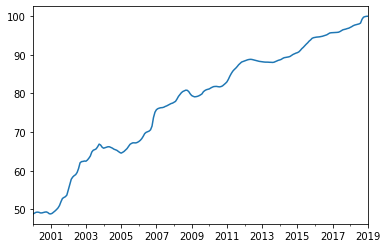

In [23]:
new_col_data['전국']['전국']['2000-01-01':].plot()
plt.show()

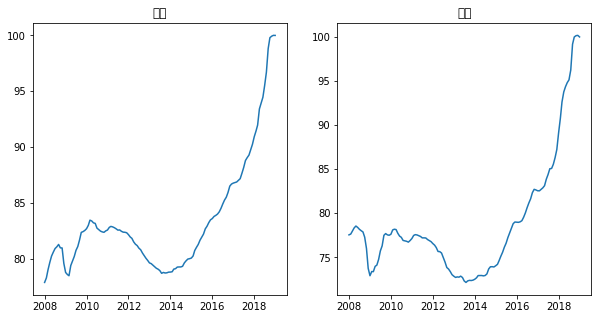

In [31]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('서울')
plt.plot(new_col_data['서울']['마포구']['2008-01':])

plt.subplot(1, 2, 2)
plt.title('대구')
plt.plot(new_col_data['서울']['강남구']['2008-01':])

plt.show()

In [34]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)
# 맥OS 인 경우 위 두 줄을 입력하지 말고 아래 코드를 입력하세요
# rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

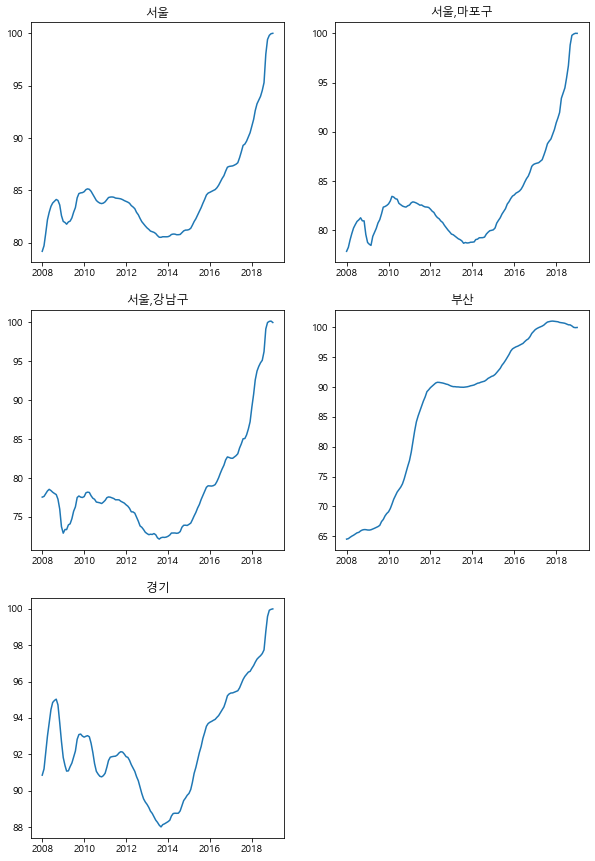

In [35]:
spots = '서울 서울,마포구 서울,강남구 부산 경기'
start_date = '2008-1'
spot_list = spots.split(' ')
num_row = int((len(spot_list)-1)/2)+1

plt.figure(figsize=(10, num_row*5))
for i, spot in enumerate(spot_list):
    plt.subplot(num_row, 2, i+1)
    plt.title(spot)
    if ',' in spot:
        si, gu = spot.split(',')
    else:
        si = gu = spot
    plt.plot(new_col_data[si][gu][start_date:])
    
plt.show()